In [31]:
#importing all the necessay libraries used in this project
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

Number of Fundings:
To Plot a line graph between year and number of fundings. Taken year on x-axis and number of fundings on y-axis.
To Print year-wise total number of fundings where years are printed in ascending order.

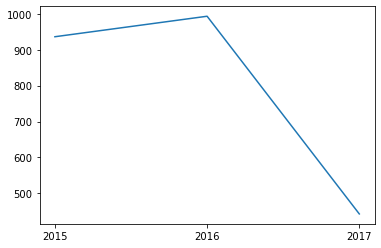

2015   936
2016   993
2017   443


In [32]:
with open("startup_funding.csv") as file_obj:
    file_data = csv.DictReader(file_obj,skipinitialspace = True)
    
    dct = {}
    
    for row in file_data:
        row["Date"] = row["Date"].replace(".","/")
        date = row["Date"].split('/')
        key = date[-1]
        
        dct[key] = dct.get(key,0) + 1
        
    ord_dct = collections.OrderedDict(sorted(dct.items()))
    
    plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
    plt.show()
    
    for i in ord_dct:
        print(i , ' ',ord_dct[i])
    
    

Top Indian Cities
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

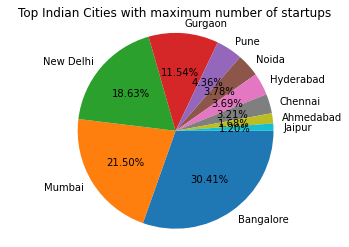

Bangalore   635
Mumbai   449
New Delhi   389
Gurgaon   241
Pune   91
Noida   79
Hyderabad   77
Chennai   67
Ahmedabad   35
Jaipur   25


In [33]:
df = pd.read_csv("startup_funding.csv")

df.dropna(subset=["CityLocation"],inplace=True)


def separateCity(city): 
    return city.split('/')[0].strip() 

df['CityLocation']=df['CityLocation'].apply(separateCity) 
    
df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'
        
city = df['CityLocation']
city = city.value_counts()[:10]

city_name = city.index
city_freq = city.values

plt.pie(city_freq,labels = city_name,autopct = "%.2f%%",counterclock = False)
plt.title("Top Indian Cities with maximum number of startups")
plt.axis('equal')
plt.show()

for i in range(len(city_name)):
    print(city_name[i],' ',city_freq[i])

Funding amount:
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

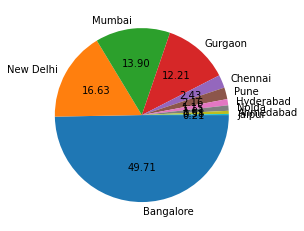

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [34]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')

df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)

df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]

city = df.index
amount = df.values

plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False)
plt.show()

percent = np.true_divide(amount,amount.sum())*100

for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

Top Industries:
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

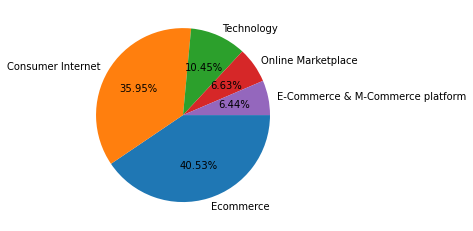

Ecommerce   40.53
Consumer Internet   35.95
Technology   10.45
Online Marketplace   6.63
E-Commerce & M-Commerce platform   6.44


In [35]:
df = pd.read_csv("startup_funding.csv")

df.dropna(subset = ["AmountInUSD"],inplace = True)

df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x:float(str(x).replace(',','')))

df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)

df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]

industry = df.index
amount = df.values

plt.pie(amount,labels = industry,counterclock = False,autopct='%0.2f%%')
plt.show()

percent = np.true_divide(amount,amount.sum()) * 100
for i in range(len(industry)):
    print(industry[i],' ',format(percent[i],'0.2f'))

Top Startups:
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.

In [36]:
df = pd.read_csv("startup_funding.csv")

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(',','')))
df = df.groupby('StartupName')['AmountInUSD'].sum()

funding = df.sort_values(ascending = False)[:5]

startupname = funding.index
totalfunding = funding.values

for i in range(5):
    print(startupname[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


Funding rounds:
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.

In [37]:
df = pd.read_csv("startup_funding.csv")

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Top Investor :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.

In [38]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
print(dct_keys[0],dct[dct_keys[0]])

Sequoia Capital 64
